<a href="https://colab.research.google.com/github/frankbass3/Graph-Neural-Networks/blob/main/Spectral_Clustering_second_eigen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

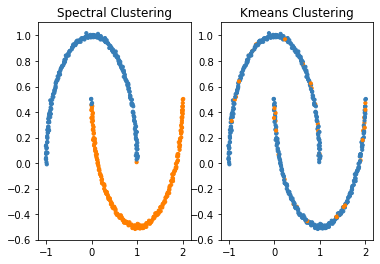

In [ ]:
from sklearn import datasets
from matplotlib import pyplot as plt
from itertools import cycle, islice
import numpy as np
from sklearn.cluster import KMeans
import sklearn


def calc_adjacen(S, k, sigma=1.0):
    N = len(S)
    A = np.zeros((N, N))

    for i in range(N):
        dist_with_index = zip(S[i], range(N))
        dist_with_index = sorted(dist_with_index, key=lambda x: x[0])
        neighbours_id = [dist_with_index[m][1] for m in range(k+1)]  # xi's k nearest neighbours

        for j in neighbours_id:  # xj is xi's neighbour
            A[i][j] = S[i][j]
            A[j][i] = A[i][j]  # mutually

    return A


def calLaplacianMatrix(adjacentMatrix):
    # compute the Degree Matrix: D=sum(A)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)

    # degreeMatrix

    # compute the Laplacian Matrix: L=D-A
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix

    # print laplacianMatrix

    # normalize
    # D^(-1/2) L D^(-1/2)
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)


def genTwoCircles(n_samples=1000):
    X, y = datasets.make_moons(n_samples,noise=0.01,random_state=100)
    return X, y


def plot(X, y_sp, y_km):
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_km) + 1))))
    plt.subplot(121)
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_sp])
    plt.title("Spectral Clustering")
    plt.subplot(122)
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_km])
    plt.title("Kmeans Clustering")
    plt.show()


# generate 2 half-circle of data
data, label = genTwoCircles(n_samples=500)

# distance matrix
Similarity = sklearn.metrics.pairwise_distances(data)

# Computes the (weighted) graph of k-Neighbors for points in X
weighted = calc_adjacen(Similarity, 50)

# Laplacian
Laplacian = calLaplacianMatrix(weighted)

# eigen values
x, V = np.linalg.eig(Laplacian)

H = V

spectral = []

spectral = np.array([1 if H[j,1] > 0 else 0  for j in range(len(H))])

pure_kmeans = KMeans(n_clusters=2).fit(H)
plot(data, spectral, pure_kmeans.labels_)
print()